In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import autograd.numpy as np

from autograd import grad
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import pandas as pd
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline 
from sklearn. preprocessing import StandardScaler

In [2]:
csvname = 'train_data.csv'
x_TrainData = np.loadtxt(csvname,delimiter = ',')

csvname = 'train_labels.csv'
y_TrainData = np.loadtxt(csvname,delimiter = ',')

csvname = 'test_data.csv'
z = np.loadtxt(csvname,delimiter = ',')

In [3]:
param_grid = {
    'C': [0.000001,0.00001,0.0001,0.001,0.1,1,100], # Regularization values
    'kernel': ['linear','rbf', 'poly'], # Kernels
    'degree': [3, 4, 5], # degrees for the 'poly' kernel
    'gamma': ['scale','auto'] # kernel coeff for 'rbf', , 'poly' and 'sigmoid'
}

# initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)

# fit grid search to the training data to find the best parameters
grid_search.fit(x_TrainData, y_TrainData)

# print best parameters found by the grid search
print("Best params:", grid_search.best_params_)

Best params: {'C': 0.0001, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}


In [4]:
# best hyperparameters from above
best_C = 0.0001
best_degree = 3
best_gamma = 'scale'
best_kernel = 'linear'

# initialize SVC model
final_svc = SVC(C=best_C, kernel=best_kernel, degree=best_degree, gamma=best_gamma, probability=True)
# create pipeline a scaler and the SVC model
final_model = Pipeline([
    ('scaler', StandardScaler ()),
    ('SVC', final_svc)
])

# train model on training data
final_model.fit(x_TrainData, y_TrainData)

# predict on test set
test_predictions = final_model.predict(z)

# convert predictions to ints
test_predictions = test_predictions.astype(np.int64)

# prep submission DataFrame
submission = pd.DataFrame ( {
    'id': np.arange(len (test_predictions)),
    'Predictions': test_predictions
})

submission.head()
submission.to_csv('SMDost_part_1_submission.csv', index=False)

In [5]:
# Analysis

# Split Data to make the last run the validation set
x_Data = x_TrainData[:140]
x_ValidData = x_TrainData[140:]
y_Data = y_TrainData[:140]
y_ValidData = y_TrainData[140:]

# initialize SVC model
final_svc = SVC(C=best_C, kernel=best_kernel, degree=best_degree, gamma=best_gamma, probability=True)

# create pipeline a scaler and the SVC model
final_model = Pipeline([
    ('scaler', StandardScaler ()),
    ('SVC', final_svc)
])

# train model on training data
final_model.fit(x_Data, y_Data)

# predict on valid set
test_predictions = final_model.predict(x_ValidData)

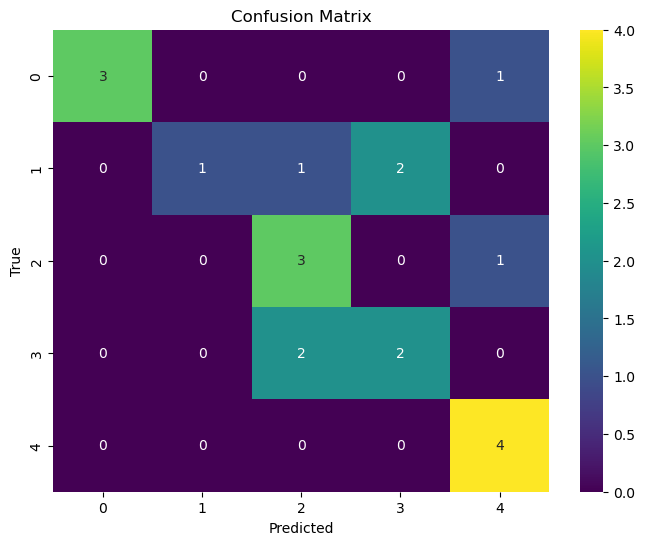

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_ValidData, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()